In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import os
import glob
import pandas as pd
mpl.rcParams['figure.dpi'] = 70

In [24]:
df = pd.read_csv('bot-vi-v33/result1.csv')


24993

In [28]:
def preprocess(dir_path, cut_len):
    M = []
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        df = pd.read_csv(file)
        reward, time_step = df['reward'].values, df['step'].values
        n = int(np.ceil(time_step[-1]/1e3))*1000
        x = range(n)
        y = np.interp(x,  time_step, reward)
        if cut_len != None:
            x = x[:cut_len]
            y = y[:cut_len]
        M.append(y)
    M = np.vstack(M)
    return M

def line_95_percent(result_path, label=None, color=None, linewidth=3, alpha=0.3, cut_len=None):
    cummulative_regret = preprocess(result_path, cut_len)
#     print(cummulative_regret.shape)

    m = np.mean(cummulative_regret, axis=0)
    s = np.std(cummulative_regret, axis=0)
    u = m + s * 1#.96
    l = m - s * 1#.96
    plt.plot(m, label=label, color=color, linewidth=linewidth, alpha=0.8)
#     plt.plot(m, label=label,linewidth=linewidth)
    plt.fill_between(range(cummulative_regret.shape[1]), u, l, alpha=alpha)

def plot_lines(dir_path):
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        print(file)
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            n = int(np.ceil(time_step[-1]/1e3))*1000
            x = range(n)
            y = np.interp(x,  time_step, reward)
            plt.plot(x, y)



def preprocess_episode(dir_path):
    M = []
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            M.append(reward)
    m0 = np.min([len(m) for m in M])
    M = [m[:m0] for m in M]
    M = np.vstack(M)
    return M

def line_95_percent_episode(result_path, label=None, color=None, linewidth=3, alpha=0.3, cut_len=None):
    cummulative_regret = preprocess_episode(result_path)
#     print(cummulative_regret.shape)

    m = np.mean(cummulative_regret, axis=0)
    s = np.std(cummulative_regret, axis=0)
    u = m + s * 1#.96
    l = m - s * 1#.96
    plt.plot(m, label=label, color=color, linewidth=linewidth, alpha=0.8)
#     plt.plot(m, label=label,linewidth=linewidth)
    plt.fill_between(range(cummulative_regret.shape[1]), u, l, alpha=alpha)

# reward =0 if reach right side, optimistic initialization

In [ ]:
ls

bot-opt-v85
bot-vi-v33


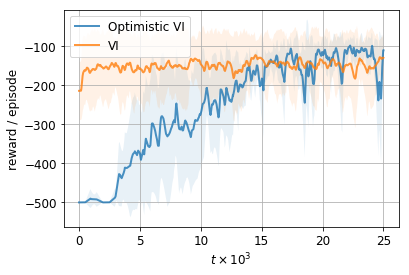

In [56]:
plt.rcParams.update({'font.size': 12})
plt.grid()
alpha=0.1
lw=2
line_95_percent('bot-opt-v85', label='Optimistic VI', linewidth=lw, alpha=alpha)
line_95_percent('bot-vi-v33', label='VI', linewidth=lw, alpha=alpha)

# line_95_percent('pole0-opt-v4', label='opt 10', linewidth=lw, alpha=alpha)
# line_95_percent('pole0-opt-vi', label='opt', linewidth=lw, alpha=alpha)
plt.legend()
plt.xticks(range(0, 26000, 5000), range(0,26,5))
plt.xlabel(r'$t\times 10^3$')
plt.ylabel('reward / episode')
# plt.title('')
plt.savefig('../notebook/pole.pdf')

bot-opt-v86
bot-vi-v34


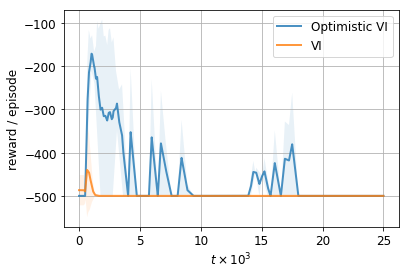

In [51]:
plt.rcParams.update({'font.size': 12})
plt.grid()
alpha=0.1
lw=2
line_95_percent('bot-opt-v86', label='Optimistic VI', linewidth=lw, alpha=alpha)
line_95_percent('bot-vi-v34', label='VI', linewidth=lw, alpha=alpha)

# line_95_percent('pole0-opt-v4', label='opt 10', linewidth=lw, alpha=alpha)
# line_95_percent('pole0-opt-vi', label='opt', linewidth=lw, alpha=alpha)
plt.legend()
plt.xticks(range(0, 26000, 5000), range(0,26,5))
plt.xlabel(r'$t\times 10^3$')
plt.ylabel('reward / episode')
# plt.title('')
plt.savefig('../notebook/pole.pdf')

In [ ]:
ls|grep bot

bot-egreedy-v23
bot-vi-v35


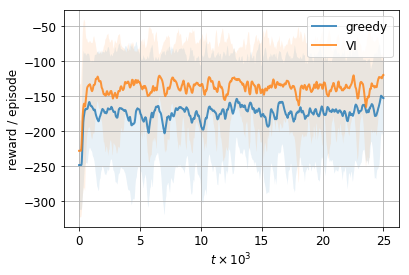

In [84]:
plt.rcParams.update({'font.size': 12})
plt.grid()
alpha=0.1
lw=2

line_95_percent('bot-egreedy-v23', label='greedy', linewidth=lw, alpha=alpha)
line_95_percent('bot-vi-v35', label='VI', linewidth=lw, alpha=alpha)

# line_95_percent('pole0-opt-v4', label='opt 10', linewidth=lw, alpha=alpha)
# line_95_percent('pole0-opt-vi', label='opt', linewidth=lw, alpha=alpha)
plt.legend()
plt.xticks(range(0, 26000, 5000), range(0,26,5))
plt.xlabel(r'$t\times 10^3$')
plt.ylabel('reward / episode')
# plt.title('')
plt.savefig('../notebook/pole.pdf')

bot-vi-v35
bot-opt-v89
bot-opt-v90


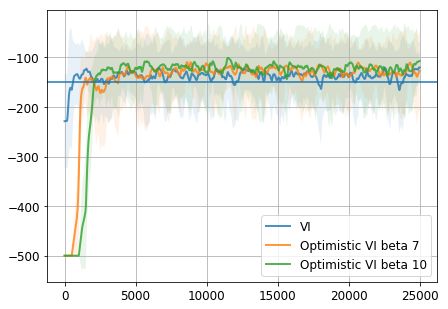

In [244]:
plt.grid()
line_95_percent('bot-vi-v35', label='VI', linewidth=lw, alpha=alpha)

# line_95_percent('bot-opt-v88', label='Optimistic VI beta 1', linewidth=lw, alpha=alpha)
# line_95_percent('bot-opt-v87', label='Optimistic VI beta 5', linewidth=lw, alpha=alpha)
line_95_percent('bot-opt-v89', label='Optimistic VI beta 7', linewidth=lw, alpha=alpha)
line_95_percent('bot-opt-v90', label='Optimistic VI beta 10', linewidth=lw, alpha=alpha)
# plt.ylim(-300, -100)
plt.axhline(-150)
plt.legend()

In [168]:
ls bot-vi-v36

result0.csv   result12.csv  result15.csv  result2.csv  result5.csv  result8.csv
result10.csv  result13.csv  result16.csv  result3.csv  result6.csv  result9.csv
result11.csv  result14.csv  result1.csv   result4.csv  result7.csv  setting.txt


In [228]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 5]

In [238]:
ls bot-vi-v36

result0.csv   result12.csv  result15.csv  result2.csv  result5.csv  result8.csv
result10.csv  result13.csv  result16.csv  result3.csv  result6.csv  result9.csv
result11.csv  result14.csv  result1.csv   result4.csv  result7.csv  setting.txt


In [230]:
ls bot-opt-v91

result0.csv   result15.csv  result20.csv  result2.csv  result8.csv
result10.csv  result16.csv  result21.csv  result3.csv  result9.csv
result11.csv  result17.csv  result22.csv  result4.csv  setting.txt
result12.csv  result18.csv  result23.csv  result5.csv
result13.csv  result19.csv  result24.csv  result6.csv
result14.csv  result1.csv   result25.csv  result7.csv


bot-vi-v36
bot-opt-v91


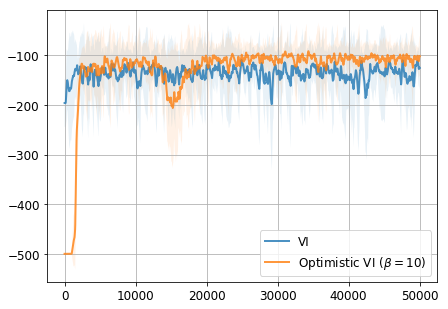

In [251]:
plt.grid()
line_95_percent('bot-vi-v36', label='VI', linewidth=lw, alpha=alpha)
line_95_percent('bot-opt-v91', label=r'Optimistic VI ($\beta=10$)', linewidth=lw, alpha=alpha)
# plt.ylim(-300, -80)
plt.legend()

bot-opt-v92
bot-egreedy-v24
bot-vi-v37


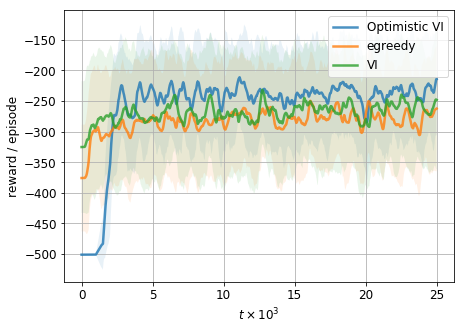

In [315]:
alpha=0.1
lw=2.5
plt.grid()
line_95_percent('bot-opt-v92', label='Optimistic VI', linewidth=lw, alpha=alpha)
line_95_percent('bot-egreedy-v24', label='egreedy', linewidth=lw, alpha=alpha)
line_95_percent('bot-vi-v37', label='VI', linewidth=lw, alpha=alpha)
# plt.ylim(-300, -100)
plt.xticks(range(0, 26000, 5000), range(0,26,5))
plt.xlabel(r'$t\times 10^3$')
plt.ylabel('reward / episode')
plt.legend()

In [256]:
plt.rcParams['figure.figsize'] = [20, 5]

In [ ]:
ls

bot-opt-v94
bot-egreedy-v25
bot-vi-v39


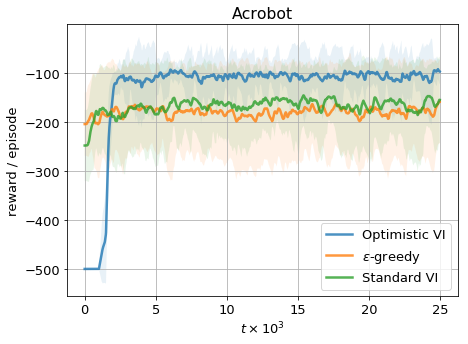

In [322]:
#sample len 2
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams.update({'font.size': 13})
plt.grid()
alpha=0.1
lw=2.5
line_95_percent('bot-opt-v94', label=r'Optimistic VI', linewidth=lw, alpha=alpha)
line_95_percent('bot-egreedy-v25', label='$\epsilon$-greedy', linewidth=lw, alpha=alpha)
line_95_percent('bot-vi-v39', label='Standard VI', linewidth=lw, alpha=alpha)
plt.xticks(range(0, 26000, 5000), range(0,26,5))
plt.xlabel(r'$t\times 10^3$')
plt.ylabel('reward / episode')
plt.legend()
plt.title('Acrobot')
plt.savefig('../notebook/acrobot.pdf')